In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For modeling
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Define the file path
file_path = '/content/MBA.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first five rows
print("First 5 rows of the dataset:")
display(data.head())

# Display dataset information
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


First 5 rows of the dataset:


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB

Missing Values in Each Column:
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5


Dropped 'application_id' column.
Imputed missing values in 'race' with the most frequent value.
Dropped 5194 rows with missing 'admission' values.
Encoded 'gender' column.
Encoded 'major' column.
Encoded 'race' column.
Encoded 'work_industry' column.
Encoded 'admission' column.

Data after encoding categorical variables:


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,False,3.30,0,0,620.0,3.0,3,0
2,0,True,3.30,0,4,710.0,5.0,13,0
6,0,False,2.93,2,3,590.0,3.0,13,0
12,0,False,3.24,1,2,640.0,6.0,10,1
14,0,False,3.03,2,4,600.0,5.0,13,0


Scaled numeric features ('gpa', 'gmat', 'work_exp').

Features shape: (1000, 8)
Target shape: (1000,)

Class distribution before balancing:
admission
0    900
1    100
Name: count, dtype: int64

Class distribution after applying SMOTE:
admission
0    900
1    900
Name: count, dtype: int64

Training set size: 1440 samples
Testing set size: 360 samples

SVM model trained successfully.

Model Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       180
           1       0.62      0.71      0.66       180

    accuracy                           0.64       360
   macro avg       0.64      0.64      0.64       360
weighted avg       0.64      0.64      0.64       360



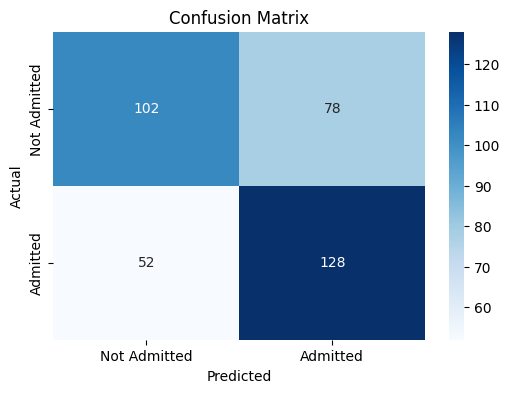

### Summary ###
The SVM model achieved an accuracy of 63.89% on the test set.
After applying SMOTE to handle class imbalance, the model is better equipped to predict both classes effectively.

### Next Steps ###
1. **Hyperparameter Tuning:** Explore different kernels (e.g., 'rbf', 'poly') and tune parameters like C and gamma using GridSearchCV.
2. **Feature Selection:** Identify and select the most impactful features to potentially improve model performance.
3. **Cross-Validation:** Implement cross-validation to ensure the model's robustness and generalizability.
4. **Explore Other Models:** Compare SVM with other classification algorithms like Random Forest, Gradient Boosting, or Logistic Regression.


In [ ]:
#Data Preprocessing

# Dropping 'application_id' as it's an identifier and not useful for modeling
data_cleaned = data.drop(columns=['application_id'])
print("\nDropped 'application_id' column.")

# Handling missing values in 'race' by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
# Handling missing values in 'race' by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
# Reshape the output to be 1D
data_cleaned['race'] = imputer.fit_transform(data_cleaned[['race']]).ravel()
print("Imputed missing values in 'race' with the most frequent value.")

# Dropping rows where 'admission' is missing since it's the target variable
initial_shape = data_cleaned.shape
data_cleaned = data_cleaned.dropna(subset=['admission'])
final_shape = data_cleaned.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} rows with missing 'admission' values.")

# List of categorical columns to encode
categorical_cols = ['gender', 'major', 'race', 'work_industry', 'admission']

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le
    print(f"Encoded '{col}' column.")

# Display the first few rows after encoding
print("\nData after encoding categorical variables:")
display(data_cleaned.head())

# Initializing the StandardScaler
scaler = StandardScaler()

# List of numeric features to scale
numeric_features = ['gpa', 'gmat', 'work_exp']

# Scaling the numeric features
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])
print("Scaled numeric features ('gpa', 'gmat', 'work_exp').")

# Defining features (X) and target (y)
X = data_cleaned.drop(columns='admission')
y = data_cleaned['admission']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display class distribution before balancing
print("\nClass distribution before balancing:")
print(y.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after balancing
print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Initializing the SVM model with a linear kernel and balanced class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Training the SVM model
svm_model.fit(X_train, y_train)
print("\nSVM model trained successfully.")

# Making predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Generating classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("### Summary ###")
print(f"The SVM model achieved an accuracy of {accuracy*100:.2f}% on the test set.")
print("After applying SMOTE to handle class imbalance, the model is better equipped to predict both classes effectively.")

print("\n### Next Steps ###")
print("1. **Hyperparameter Tuning:** Explore different kernels (e.g., 'rbf', 'poly') and tune parameters like C and gamma using GridSearchCV.")
print("2. **Feature Selection:** Identify and select the most impactful features to potentially improve model performance.")
print("3. **Cross-Validation:** Implement cross-validation to ensure the model's robustness and generalizability.")
print("4. **Explore Other Models:** Compare SVM with other classification algorithms like Random Forest, Gradient Boosting, or Logistic Regression.")

